<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-09-22 18:33:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
^C


Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [17]:
Get_data = """
SELECT ConvertedComp
FROM master
"""
pd.read_sql_query(Get_data,conn)

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


### Histograms


Plot a histogram of `ConvertedComp.`


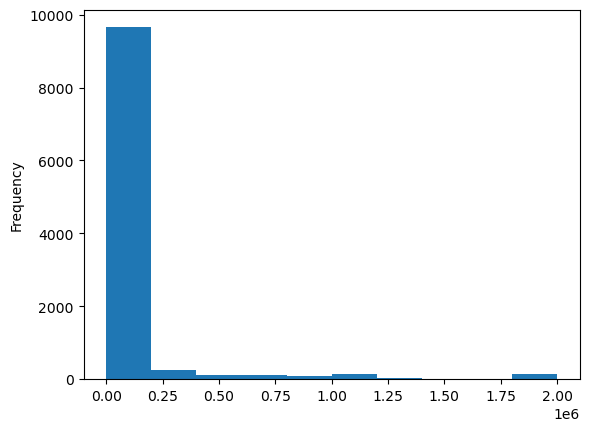

In [20]:
# your code goes here

Get_data = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(Get_data,conn)

data = df['ConvertedComp']
data.head()
data.plot(kind='hist')
plt.show()

In [ ]:
count,bin_edges = np.histogram(data)
plt.hist(data, bins = bin_edges)
plt.xticks(bin_edges)
plt.ylim(200000)
plt.show()

### Box Plots


Plot a box plot of `Age.`


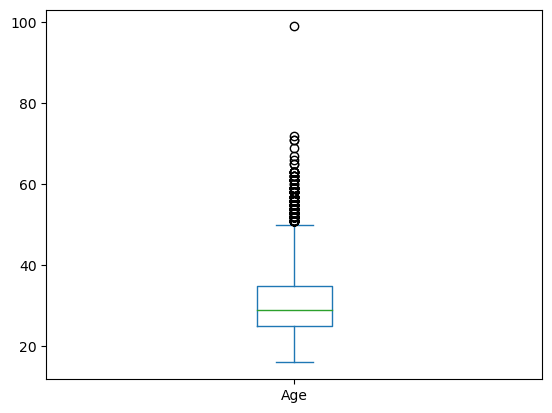

In [21]:
# your code goes here

Get_age = """
SELECT Age
FROM master
"""
df_age = pd.read_sql_query(Get_age,conn)

data_age = df_age['Age']
data_age.head()
data_age.plot(kind='box')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


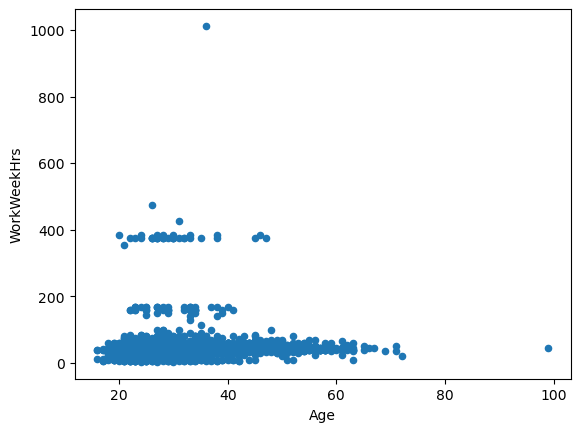

In [27]:
# your code goes here

Get_scatter = """
SELECT WorkWeekHrs,Age
FROM master
"""
df_scatter = pd.read_sql_query(Get_scatter,conn)
df_scatter.head()
df_scatter.plot(kind='scatter',x='Age',y='WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


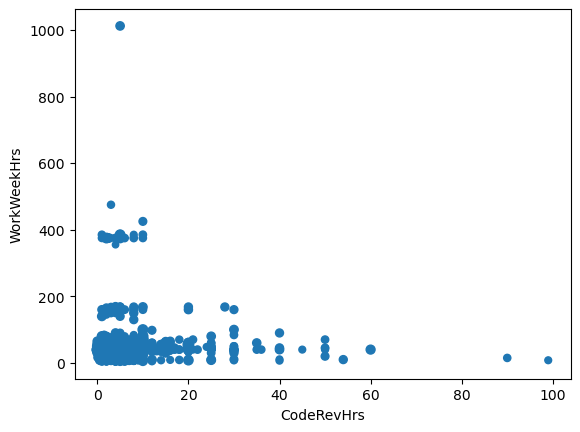

In [28]:
# your code goes here

Get_bubble = """
SELECT WorkWeekHrs,Age,CodeRevHrs
FROM master
"""
df_bubble = pd.read_sql_query(Get_bubble,conn)
df_bubble.head()
df_bubble.plot(kind='scatter',x='CodeRevHrs',y='WorkWeekHrs',s='Age')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


QUERY_1 = """
SELECT *
FROM master
"""

the read_sql_query runs the sql query and returns the data as a dataframe
df_1 = pd.read_sql_query(QUERY,conn)
df.head()

In [11]:
QUERY_1 = """
SELECT Respondent
FROM master
"""

#the read_sql_query runs the sql query and returns the data as a dataframe
df_1 = pd.read_sql_query(QUERY_1,conn)
df_1.head()

,Respondent
0,4
1,9
2,13
3,16
4,17


In [20]:
# your code goes here
top_5 =""" SELECT Employment
           FROM master
           """

df_pie = pd.read_sql_query(top_5,conn)
df_pie.head()

,Employment
0,Employed full-time
1,Employed full-time
2,Employed full-time
3,Employed full-time
4,Employed full-time


In [44]:
top_5 =""" SELECT *
           FROM DatabaseDesireNextYear
           """

df_pie = pd.read_sql_query(top_5,conn)
data = df_pie['DatabaseDesireNextYear'].value_counts().reset_index()
data.columns = ['DataBase','Count']


data.head(10)


,DataBase,Count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856
5,Microsoft SQL Server,2706
6,SQLite,2437
7,Firebase,1650
8,MariaDB,1385
9,DynamoDB,1044


In [49]:
df_pie.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


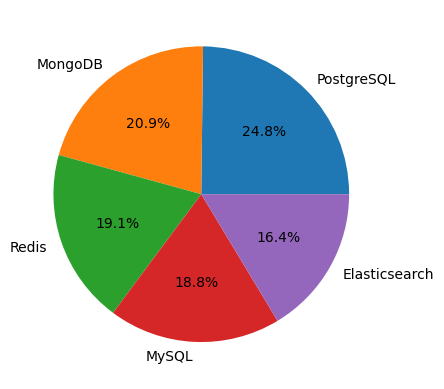

In [54]:
#Using SQL
top_5_sql =""" SELECT DatabaseDesireNextYear, COUNT(*) as count
           FROM DatabaseDesireNextYear
           GROUP BY DatabaseDesireNextYear
           ORDER BY count DESC
           
           LIMIT 5;
           """

df_pie_1 = pd.read_sql_query(top_5_sql,conn)
df_pie_1.columns = ['Database','Frequency']
plt.pie(df_pie_1['Frequency'] ,labels = df_pie_1['Database'] ,autopct = '%1.1f%%')
plt.show()

In [56]:
lang_pie =""" SELECT LanguageWorkedWith,COUNT(*) as Freq
           FROM LanguageWorkedWith
           GROUP BY LanguageWorkedWith
           ORDER BY Freq DESC
           LIMIT 5;
           """
lang_pie_df = pd.read_sql_query(lang_pie,conn)
lang_pie_df.head()

,LanguageWorkedWith,Freq
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


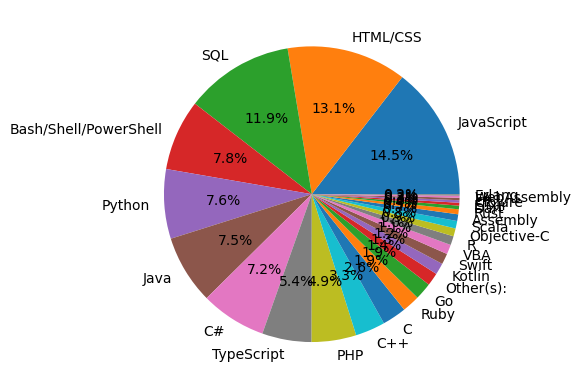

In [37]:
lang_count = lang_pie_df['LanguageWorkedWith'].value_counts().reset_index()
#lang_count.plot(kind = 'pie')
lang_count.columns = ['Languages','Count']

plt.pie(lang_count['Count'] ,labels = lang_count['Languages'] ,autopct = '%1.1f%%')
plt.show()

In [65]:
lang_pie =""" SELECT LanguageDesireNextYear,COUNT(*) as Freq
           FROM LanguageDesireNextYear
           GROUP BY LanguageDesireNextYear
           ORDER BY Freq DESC
           LIMIT 5;
           """
lang_pie_df = pd.read_sql_query(lang_pie,conn)
lang_pie_df.head()

,LanguageDesireNextYear,Freq
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [33]:
lang_count.head()

JavaScript               8687
HTML/CSS                 7830
SQL                      7106
Bash/Shell/PowerShell    4642
Python                   4542
Name: LanguageWorkedWith, dtype: int64

In [66]:
#MYSQL Question 
platform_pie =""" SELECT *
           FROM MiscTechWorkedWith
           """
platform_pie_df = pd.read_sql_query(platform_pie,conn)
#platform_pie_df.head(10)
unique=platform_pie_df['MiscTechWorkedWith'].unique()
print(unique)

['.NET' 'Node.js' 'Unity 3D' 'Xamarin' '.NET Core' 'Pandas' 'Ansible'
 'Cordova' 'Chef' 'Puppet' 'React Native' 'TensorFlow' 'Hadoop'
 'Torch/PyTorch' 'Apache Spark' 'Flutter' 'Other(s):' 'Unreal Engine'
 'CryEngine']


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


TypeError: only size-1 arrays can be converted to Python scalars

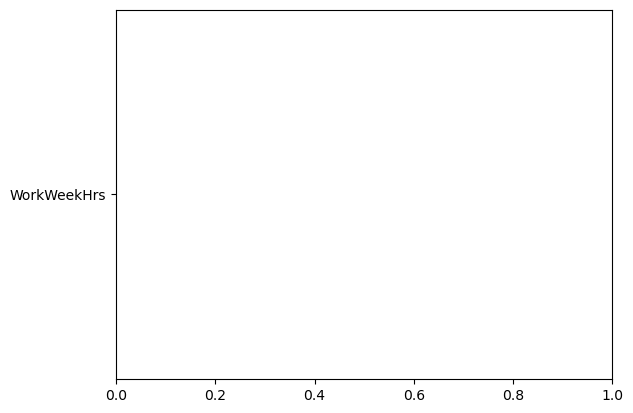

In [48]:
# your code goes here

Get_stacked = """
SELECT WorkWeekHrs,CodeRevHrs
FROM master
"""
df_stacked = pd.read_sql_query(Get_stacked,conn)
df_fram = pd.DataFrame(df_stacked)
plt.bar(df_fram,'WorkWeekHrs')
plt.bar(df_fram,'CodeRevHrs')
plt.show()

In [49]:
df_stacked = pd.read_sql_query(Get_stacked,conn)
df_stacked.head()
df_stacked.plot(kind='bar', stacked = True)
plt.show()

KeyboardInterrupt: 

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [43]:
# your code goes here

Get_median= """ SELECT ConvertedComp 
            FROM master
            WHERE (Age>45 AND Age <60)"""
df_median = pd.read_sql_query(Get_median,conn)
df_median_clean = df_median.dropna()
#df_median_clean.head()
median = df_median_clean['ConvertedComp'].median()
print(median)

101542.0


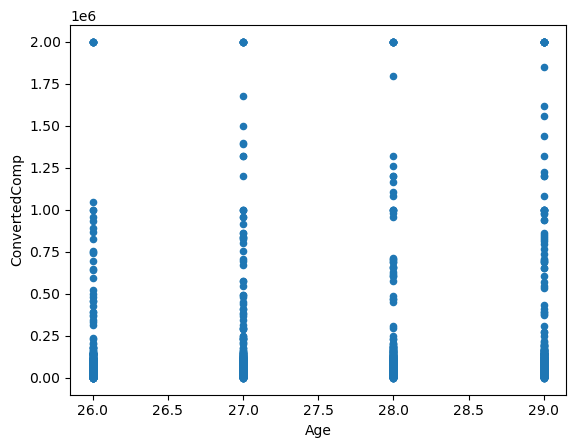

,ConvertedComp,Age
0,90000.0,28.0
1,455352.0,26.0
2,65277.0,29.0
3,20623.0,27.0
4,107000.0,27.0


In [16]:
get_line = """ SELECT ConvertedComp,Age
            FROM master
            WHERE (Age > 25 AND Age <30)"""
df_line = pd.read_sql_query(get_line,conn)
df_line.plot(kind='line',x='Age',y='ConvertedComp')
plt.show()
df_line.head()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


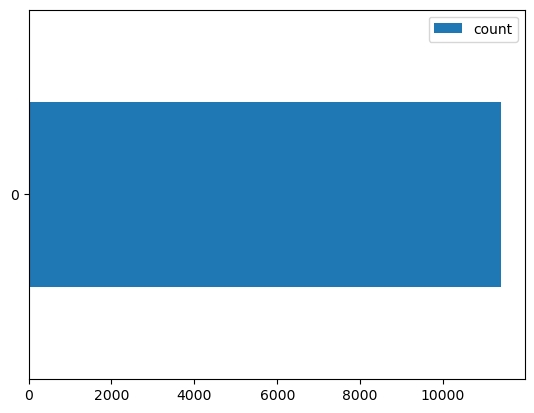

In [47]:
# your code goes here
Get_MainBranch= """ SELECT MainBranch,COUNT(*) as count 
            FROM master"""
df_MainBranch = pd.read_sql_query(Get_MainBranch,conn)
df_MainBranch.head()
df_MainBranch.plot(kind='barh')
plt.show()


In [5]:
#For graded Quiz 2 
#Using SQL
DevType=""" SELECT DevType, COUNT(*) as count
           FROM DevType
           GROUP BY DevType
           ORDER BY count DESC
           
           LIMIT 5;"""
df_dev = pd.read_sql_query(DevType,conn)
df_dev.head()


,DevType,count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


Close the database connection.


In [67]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
